# Prologue - Your first day at the lab

*You just started your graduate studies with Dr. Ryoko as your advisor.<br/>
On your first day, you arrive at the lab only to find no one there.*


*You decide to look around while waiting for your advisor to arrive. <br/>
Suddenly, one of the monitors nearby lights up and startles you.*<br/> 

*There in the monitor, looking straight at you was Dr. Ryoko,* <br/> 
*wearing her signature traditional Japanese outfit.*


*Dr. Ryoko greets you and tells you that she is visiting another lab.* <br/> 
*She tells you that she is in the middle of an important experiment,*<br/> 
*and won't be back for another few weeks.*<br/> 

*She asks you to work on these exercises until she returns...*

[<< Click here to communicate with Dr. Ryoko through the web cam >>](https://youtu.be/eLw7fWb2xv4)

# Week1-A: Adder in Quantum Circuits

Hi! Welcome to our lab. This week, we will start by learning how to perform simple additions using quantum circuits.<br/>

Just like in classical computation, where you can combine different logical gates (e.g., AND, OR, XOR, etc.) to create binary adders, you can make adders with quantum circuits as well.

Before starting the exercises, run the first cell below by clicking on it and then pressing 'shift' + 'enter'. This is the general way to execute a code cell in a Jupyter notebook environment that you are using now. While it is running, you will see `In [*]`: in the top left of that cell. Once it finishes running, you will see a number instead of the star, which indicates how many cells you've run. You can find more information about Jupyter notebooks here: https://qiskit.org/textbook/ch-prerequisites/python-and-jupyter-notebooks.html.

In [152]:
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_bloch_multivector

# If you run this code outside IBM Quantum Experience,
# run the following commands to store your API token locally.
# Please refer https://qiskit.org/documentation/install.html#access-ibm-quantum-systems

# Loading your IBM Q account(s)
IBMQ.load_account()

configrc.store_credentials:WARNING:2020-12-22 08:30:11,620: Credentials already present. Set overwrite=True to overwrite.
/Users/iuliazidaru/Documents/workspace/IBMQuantumChallenge2020/venv/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-12-22 08:30:12,241: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### What are quantum circuits?
Quantum circuits are models for quantum computation in which a computation is a sequence of quantum gates. Let's take a look at some of the popular quantum gates.

### X Gate
An X gate equates to a rotation around the X-axis of the Bloch sphere by $\pi$ radians.
It maps $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$. It is the quantum equivalent of the NOT gate for classical computers and is sometimes called a bit-flip. If you are not familiar with linear algebra, you can learn it here: https://qiskit.org/textbook/ch-appendix/linear_algebra.html.

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

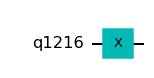

In [153]:
# Let's do an X-gate on a |0> qubit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q[0])
qc.draw(output='mpl')

Note: There is a new syntax that omits `Quantum Register` , but in this challenge, we will use the above syntax because it is easier to understand the algorithms of complex quantum circuits. (You can see the new notation [here](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html?highlight=quantumcircuit#qiskit.circuit.QuantumCircuit).）

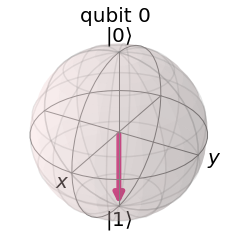

In [154]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

### H Gate
A Hadamard gate represents a rotation of $\pi$ about the axis that is in the middle of the $X$-axis and $Z$-axis.
It maps the basis state $|0\rangle$ to $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, which means that a measurement will have equal probabilities of being `1` or `0`, creating a 'superposition' of states. This state is also written as $|+\rangle$.

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

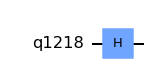

In [155]:
# Let's do an H-gate on a |0> qubit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.draw(output='mpl')

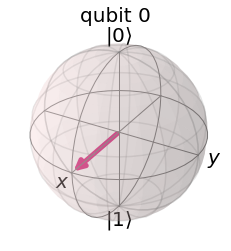

In [156]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

### Z Gate
The Z gate represents a rotation around the Z-axis of the Bloch sphere by $\pi$ radians. It is sometimes called a 'phase shift gate'.

$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}$

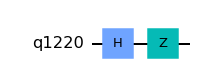

In [157]:
# Let's do an Z-gate on |+>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.z(q[0])
qc.draw(output='mpl')

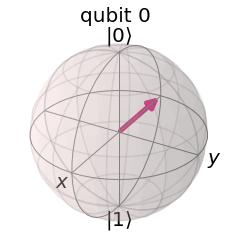

In [158]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

### CX Gate (CNOT Gate)
The controlled NOT (or CNOT or CX) gate acts on two qubits. It performs the NOT operation (equivalent to applying an X gate) on the second qubit only when the first qubit is $|1\rangle$ and otherwise leaves it unchanged. Note: Qiskit numbers the bits in a string from right to left.

$CX = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}$

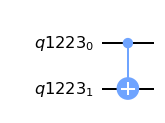

In [159]:
# Let's do an CX-gate on |00>
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
qc.draw(output='mpl')

### CZ Gate
The CZ gate acts on two qubits, called a 'control bit' and a 'target bit'. It flips the sign (equivalent to applying the phase shift Z gate) of the target qubit if and only if the control qubit is $|1\rangle$.

$CZ = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1\\
\end{pmatrix}$

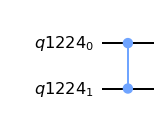

In [160]:
# Let's do an CZ-gate on |00>
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])
qc.draw(output='mpl')

Note: A CZ gate can also be constructed from a CX gate and an H gate.

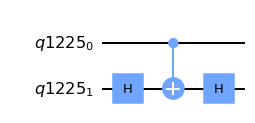

In [161]:
# Let's make CZ-gate with CX-gate and H-gate
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(q[1])
qc.cx(q[0],q[1])
qc.h(q[1])
qc.draw(output='mpl')

### CCX Gate
The CCX gate is also called a Toffoli gate.
The CCX gate is a three-bit gate, with two controls and one target as their input and output. If the first two bits are in the state $|1\rangle$, it applies a Pauli-X (or NOT) on the third bit. Otherwise, it does nothing. Note: Qiskit numbers the bits in a string from right to left.

$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
\end{pmatrix}$

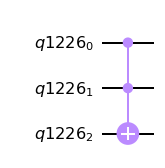

In [162]:
# Let's do an CCX-gate on |000>
q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.ccx(q[0],q[1],q[2])
qc.draw(output='mpl')

To learn about other quantum gates, refer to [Single Qubit Gates](https://qiskit.org/textbook/ch-states/single-qubit-gates.html) in the Qiskit Textbook.

## Creating logical gates with quantum gates
Now let's start creating a classic logic gate using quantum gates.
Each gate and their truth tables will be shown. Here we denote quantum registers as 'q' and classical registers as 'c' where we encode the output of the measurement.

### NOT Gate
As was mentioned before, an X gate can be considered a NOT gate. The truth table for a NOT gate looks like this:


|input|output|
|--|--|
|0|1|
|1|0|

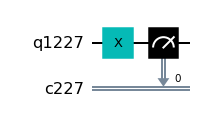

In [163]:
# Create a Quantum Circuit with 1 quantum register and 1 classical register
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.x(q[0])
qc.measure(q[0], c[0])    # Map the quantum measurement to the classical bits
qc.draw(output='mpl')

### AND Gate
The truth table for an AND Gate looks like this:

|A (input)|B (input)|output|
|--|--|--|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

With a CCX gate, the result of an AND gate for two control bits will be output to its target bit.

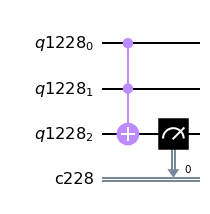

In [164]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### NAND Gate
A NAND gate can be made by applying a NOT gate after applying an AND gate.

|A(input)|B(input)|output|
|--|--|--|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

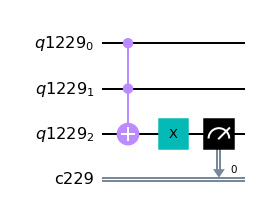

In [165]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### OR Gate

|A(input)|B(input)|output|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

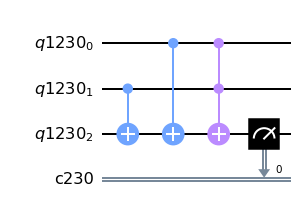

In [166]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### XOR Gate
|A(input)|B(input)|output|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

{'0': 1000}


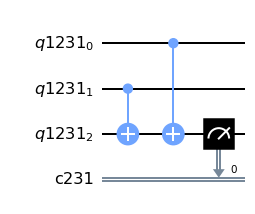

In [167]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
#qc.x(q[0])
#qc.x(q[1])
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

### NOR Gate

|A(input)|B(input)|output|
|--|--|--|
|0|0|1|
|0|1|0|
|1|0|0|
|1|1|0|

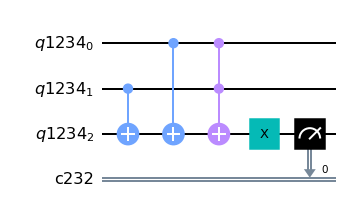

In [168]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

# Adder
An adder is a digital logic circuit that performs addition of numbers. 

In this example, we are going to take a look at the simplest adders, namely half adder and full adder.

## Half Adder
The half adder is used to add together the two least significant digits in a binary sum.
It has two single binary inputs, called A and B, and two outputs C (carry out) and S (sum).
The output C will be used as an input to the Full Adder, which will be explained later, for obtaining the value in the higher digit.

Half adders can be described with the truth table shown below.

|A (input)|B (input)|S (sum)|C (carry out)|
|-----------|------------|------------|------------|
|0|0|0|0|
|0|1|1|0|
|1|0|1|0|
|1|1|0|1|

From the truth table, you should notice that the carry output, C, is a result of operating an AND gate against A and B, where the output S is a result of operating an XOR against A and B.
As we have already created the AND and XOR gates, we can combine these gates and create a half adder as follows.

We denote our quantum register as 'q', classical registers as 'c', assign inputs A and B to q[0] and q[1], the sum output S and  carry output C to q[2] and q[3].

{'00': 1000}


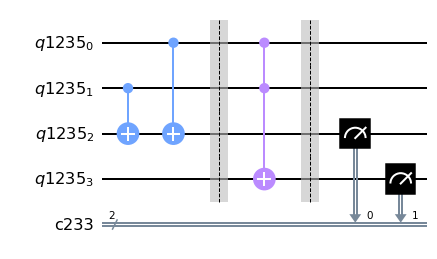

In [169]:
#Define registers and a quantum circuit
q = QuantumRegister(4)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

#qc.x(q[1])
#XOR
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.barrier()

#AND
qc.ccx(q[0], q[1], q[3])
qc.barrier()

#Sum
qc.measure(q[2], c[0])
#Carry out
qc.measure(q[3], c[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')


## <span style="color: red; ">IMPORTANT: How to calculate Quantum Costs using an Unroller</span>
There are several ways to evaluate an efficiency of a program (quantum circuit). Such as:

1. Number of quantum bits
2. Depth
3. Program execution speed (Runtime)
4. Number of instructions

These are all important factors that impact the results and throughput of quantum computation. In this particular challenge, we will use the number of instructions to evaluate the efficiency of our program. We will call the number of instructions "cost" throughout this challenge and will use the following formula to evaluate the cost of a circuit.

Cost $=$ Single-qubit gates $+$ CX gates $\times 10$

Any given quantum circuit can be decomposed into single-qubit gates (an instruction given to a single qubit) and two-qubit gates. With the current Noisy Intermediate-Scale Quantum (NISQ) devices, CX gate error rates are generally 10x higher than a single qubit gate. Therefore, we will weigh CX gates 10 times more than a single-qubit gate for cost evaluation.

You can evaluate gate costs by yourself by using a program called "Unroller."
To elaborate on this, let's take a look at the example below.

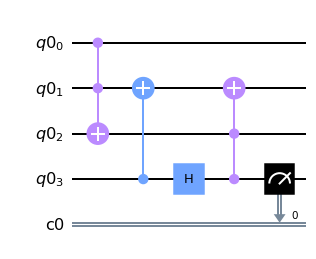

In [170]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, process_fidelity
q = QuantumRegister(4, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.cx(q[3], q[1])
qc.h(q[3])
qc.ccx(q[3], q[2], q[1])
qc.measure(q[3],c[0])
qc.draw(output='mpl')

In [171]:
qc.count_ops()

OrderedDict([('ccx', 2), ('cx', 1), ('h', 1), ('measure', 1)])

As you can see, this quantum circuit contains a Hadamard gate, a CX gate and CCX gates. By using qiskit.transpiler and importing PassManager, we can decompose this circuit into gates specified by the Unroller as shown below. In this case, into U3 gates and CX gates.

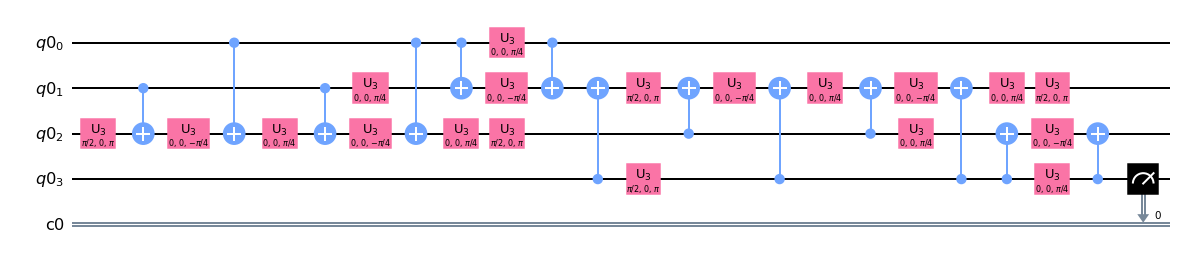

In [172]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [173]:
new_circuit.count_ops()

OrderedDict([('u3', 19), ('cx', 13), ('measure', 1)])

Thus, the cost of this circuit is $19+13\times10=149$.

You can easily check how any arbitrary gate can be decomposed by using the Unroller. So, if you are interested in how a particular two-qubit gate or three-qubit gate can be decomposed, we encourage you to try it yourself. In the example below, we used the Unroller to decompose a CCX gate into U3 gates and CX gates. 

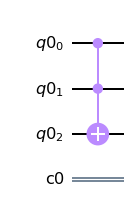

In [174]:
q = QuantumRegister(3, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.draw(output='mpl')

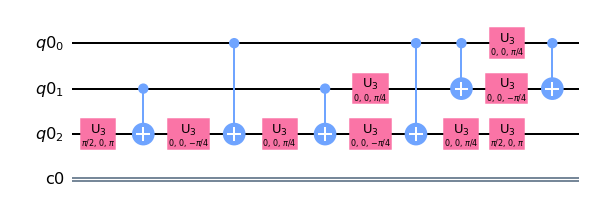

In [175]:
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [176]:
new_circuit.count_ops()

OrderedDict([('u3', 9), ('cx', 6)])

So, the total cost of a CCX gate can be calculated as $9+6\times10=69$.

# Learning Exercise I-A
The full adder takes two binary numbers plus an overflow bit, which we will call X, as its input.
Create a full adder with input data:

$A=1$, $B=0$, $X=1$
. 

The truth table for the full adder is given below.

|A(input)|B(input)|X(carry input)|S(sum)|C(carry out)|
|--|--|--|--|--|
|0|0|0|0|0|
|0|0|1|1|0|
|0|1|0|1|0|
|0|1|1|0|1|
|1|0|0|1|0|
|1|0|1|0|1|
|1|1|0|0|1|
|1|1|1|1|1|

Call your quantum register 'q' and classical register 'c'. Assign inputs A, B and X to q[0], q[1] and q[2] respectively, the sum output S to c[0] and carry output C to c[1].

In [194]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute

##### build your quantum circuit here
# Define quantum circuit
def OR(qc, qubitA, qubitB, qubitResult):
    qc.cx(qubitB, qubitResult)
    qc.cx(qubitA, qubitResult)
    qc.ccx(qubitA, qubitB, qubitResult)
    
def half_add(qc, qubitA, qubitB, qubitSum, qubitCarry):
    #XOR
    qc.cx(qubitB, qubitSum)
    qc.cx(qubitA, qubitSum)
    #AND
    qc.ccx(qubitA, qubitB, qubitCarry)

def build_circuit(a, b, x):
    q = QuantumRegister(8)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q,c)
    
    qubit_a = q[0]
    qubit_b = q[1]
    qubit_x = q[2]
    qubit_sum_ab = q[4]
    qubit_carry_ab = q[3]
    qubit_sum_abx = q[6]
    qubit_carry_abx = q[5]
    qubit_or_carry_ab_carry_abx = q[7]
    
    classic_sum = c[0]
    classic_carry = c[1]
    
    if a == 1:
        qc.x(qubit_a)
    if b == 1:
        qc.x(qubit_b)
    if x == 1:
        qc.x(qubit_x)
        
    half_add(qc, qubit_a, qubit_b, qubit_sum_ab, qubit_carry_ab)
    half_add(qc, qubit_sum_ab, qubit_x, qubit_sum_abx, qubit_carry_abx)
    OR(qc, qubit_carry_ab, qubit_carry_abx, qubit_or_carry_ab_carry_abx)
   
    # measure
    qc.measure(qubit_sum_abx, classic_sum)
    #Carry out
    qc.measure(qubit_or_carry_ab_carry_abx, classic_carry)
    
    # execute the circuit by qasm_simulator
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1000)
    result = job.result()
    count =result.get_counts()
    print(count)
    qc.draw(output='mpl')



a = [0 , 0 , 0 , 0 , 1 , 1 , 1 , 1]
b = [0 , 0 , 1 , 1 , 0 , 0 , 1 , 1]
x = [0 , 1 , 0 , 1 , 0 , 1 , 0 , 1]

for i in range(0,8):
    build_circuit(a[i], b[i], x[i])
    
#build_circuit(0, 0, 1)

{'00': 1000}
{'01': 1000}
{'01': 1000}
{'10': 1000}
{'01': 1000}
{'10': 1000}
{'10': 1000}
{'11': 1000}


In [192]:
# Check your answer using following code
from qc_grader import grade_ex1a
grade_ex1a(qc)

Computing cost...
Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 269.
Feel free to submit your answer.


In [180]:
# Submit your answer. You can re-submit at any time.
from qc_grader import submit_ex1a
submit_ex1a(qc)

Computing cost...
Submitting your answer. Please wait...
Failed: 400 Client Error: Bad Request for url: https://auth-dev.quantum-computing.ibm.com/api/users/loginWithToken
